In [1840]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [1841]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [1842]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [1843]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [1844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [1845]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

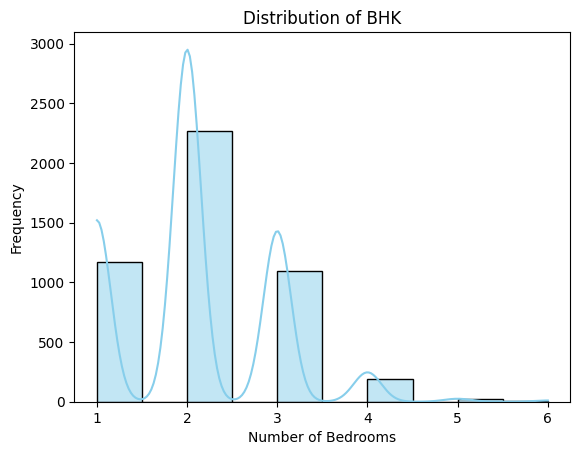

0.5992157733648072


In [1846]:
sns.histplot(df['BHK'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BHK')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()
print(df['BHK'].skew())

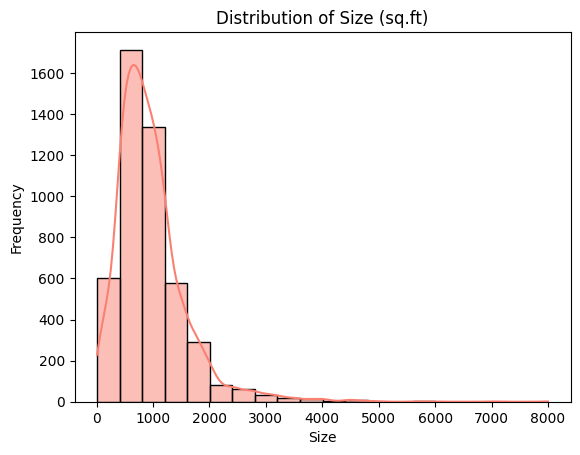

2.2998924373541834


In [1847]:
sns.histplot(df['Size'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Size (sq.ft)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Size'].skew())

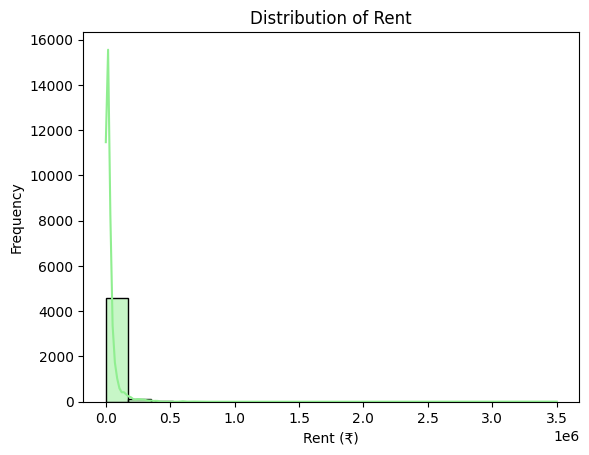

21.409942283288803


In [1848]:
sns.histplot(df['Rent'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Rent')
plt.xlabel('Rent (₹)')
plt.ylabel('Frequency')
plt.show()
print(df['Rent'].skew())

In [1849]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
pt_bhk = PowerTransformer(method='yeo-johnson')
pt_size = PowerTransformer(method='yeo-johnson')
pt_rent = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()

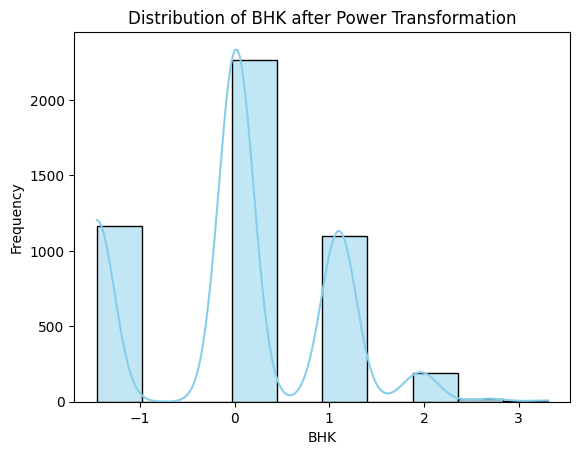

-0.005718213972698176


In [1850]:
df['BHK_transformed'] = pt_bhk.fit_transform(df[['BHK']])
df['BHK_transformed'] = scaler.fit_transform(df[['BHK_transformed']])
sns.histplot(df['BHK_transformed'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BHK after Power Transformation')
plt.xlabel('BHK')
plt.ylabel('Frequency')
plt.show()
print(df['BHK_transformed'].skew())

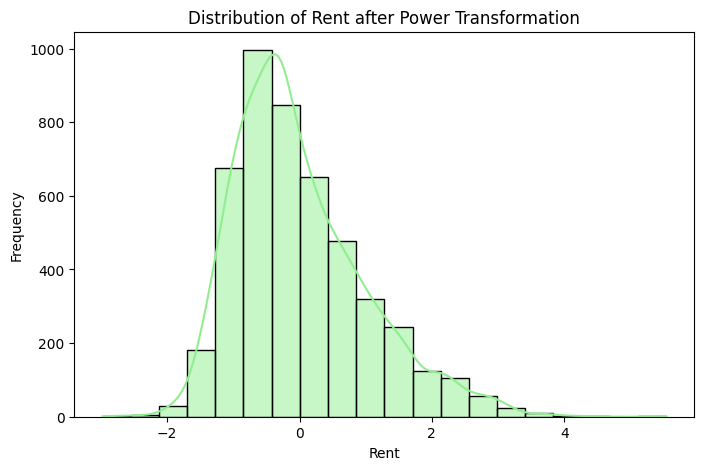

0.9090024947791435


In [1851]:
df['Rent_transformed'] = np.log1p(df['Rent'])
df['Rent_transformed'] = scaler.fit_transform(df[['Rent_transformed']])
plt.figure(figsize=(8,5))
sns.histplot(df['Rent_transformed'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Rent after Power Transformation')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()
print(df['Rent_transformed'].skew())

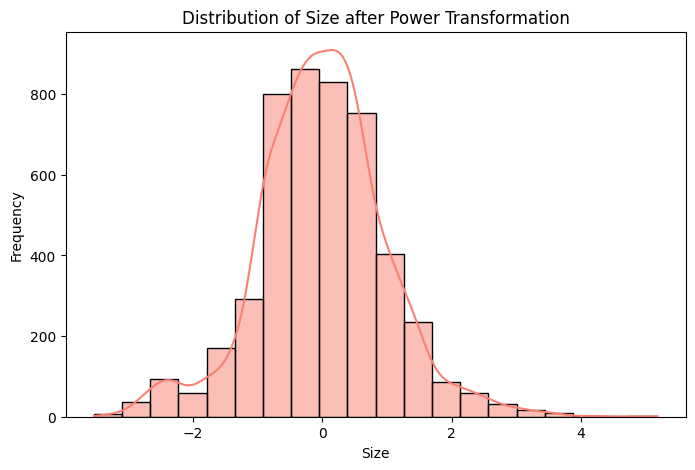

0.08229828671608086


In [1852]:
df['Size_transformed'] = pt_size.fit_transform(df[['Size']])
df['Size_transformed'] = scaler.fit_transform(df[['Size_transformed']])
plt.figure(figsize=(8,5))
sns.histplot(df['Size_transformed'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Size after Power Transformation')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Size_transformed'].skew())

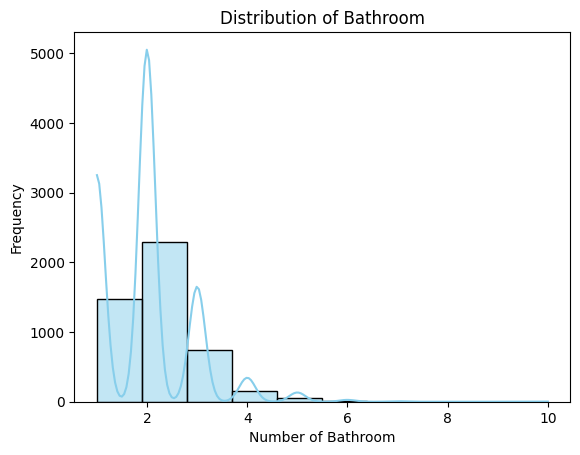

0.5992157733648072


In [1853]:
sns.histplot(df['Bathroom'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Bathroom')
plt.xlabel('Number of Bathroom')
plt.ylabel('Frequency')
plt.show()
print(df['BHK'].skew())

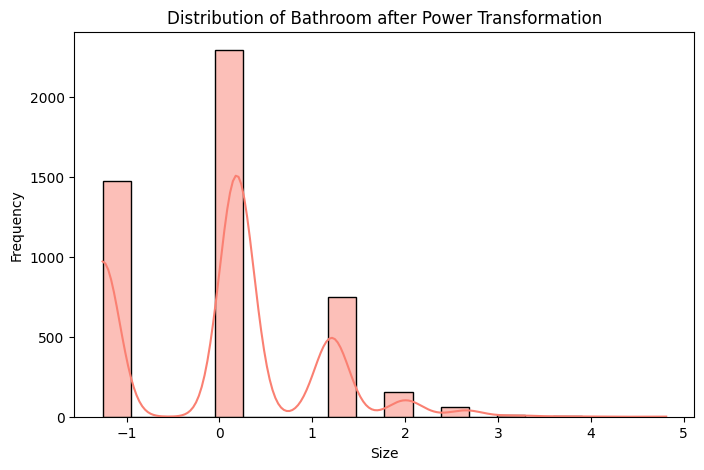

0.3012875428582889


In [1854]:
df['Bathroom_transformed'] = np.log1p(df['Bathroom'])
df['Bathroom_transformed'] = scaler.fit_transform(df[['Bathroom_transformed']])
plt.figure(figsize=(8,5))
sns.histplot(df['Bathroom_transformed'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Bathroom after Power Transformation')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Bathroom_transformed'].skew())

In [1855]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,BHK_transformed,Rent_transformed,Size_transformed,Bathroom_transformed
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.017108,-0.713054,0.418173,0.184957
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.017108,0.027042,-0.091187,-1.258965
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.017108,-0.146488,0.259952,-1.258965
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.017108,-0.713054,-0.091187,-1.258965
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.017108,-1.020208,0.001613,-1.258965


In [1856]:
df_model = df[['BHK_transformed', 'Size_transformed', 'Bathroom_transformed',
               'City', 'Furnishing Status','Area Type',
               'Rent_transformed']].copy()
categorical_cols = ['City', 'Furnishing Status','Area Type']
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
df_encoded.head()

,BHK_transformed,Size_transformed,Bathroom_transformed,Rent_transformed,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Carpet Area,Area Type_Super Area
0,0.017108,0.418173,0.184957,-0.713054,False,False,False,True,False,False,True,False,True
1,0.017108,-0.091187,-1.258965,0.027042,False,False,False,True,False,True,False,False,True
2,0.017108,0.259952,-1.258965,-0.146488,False,False,False,True,False,True,False,False,True
3,0.017108,-0.091187,-1.258965,-0.713054,False,False,False,True,False,False,True,False,True
4,0.017108,0.001613,-1.258965,-1.020208,False,False,False,True,False,False,True,True,False


In [1857]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.head()

,BHK_transformed,Size_transformed,Bathroom_transformed,Rent_transformed,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Carpet Area,Area Type_Super Area
0,0.017108,0.418173,0.184957,-0.713054,0,0,0,1,0,0,1,0,1
1,0.017108,-0.091187,-1.258965,0.027042,0,0,0,1,0,1,0,0,1
2,0.017108,0.259952,-1.258965,-0.146488,0,0,0,1,0,1,0,0,1
3,0.017108,-0.091187,-1.258965,-0.713054,0,0,0,1,0,0,1,0,1
4,0.017108,0.001613,-1.258965,-1.020208,0,0,0,1,0,0,1,1,0


In [1858]:
X = df_encoded.drop(['Rent_transformed'], axis=1)
y = df_encoded['Rent_transformed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (Slope)': model.coef_
})
intercept = model.intercept_
r2_train = r2_score(y_train, y_train_pred)
mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Intercept:", intercept)
print("Coefficients:\n", coefficients)
print("Train R2:", r2_train)
print("Train RMSE:", mse_train)
print("Test R2:", r2_test)
print("Test RMSE:", mse_test)

Intercept: -0.16648426723014956
Coefficients:
                              Feature  Coefficient (Slope)
0                    BHK_transformed             0.175778
1                   Size_transformed             0.297015
2               Bathroom_transformed             0.209043
3                       City_Chennai            -0.093555
4                         City_Delhi             0.345846
5                     City_Hyderabad            -0.194457
6                       City_Kolkata            -0.308370
7                        City_Mumbai             1.187775
8   Furnishing Status_Semi-Furnished            -0.177744
9      Furnishing Status_Unfurnished            -0.295263
10             Area Type_Carpet Area             0.261421
11              Area Type_Super Area             0.072344
Train R2: 0.7777780774614154
Train RMSE: 0.47238506850524153
Test R2: 0.7915457382235345
Test RMSE: 0.4527461477612997
